In [0]:
import pandas as pd
import numpy as np
import datetime as dt
import logging
import warnings
warnings.filterwarnings('ignore')

In [0]:
%reload_ext autoreload
%autoreload 2

In [0]:
#!pip install fastai==0.7.0

In [0]:
from fastai.tabular import *
#from fastai.learner import *
from fastai.text import *
#from fastai.column_data import *
from fastai.imports import *

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "drive/My Drive/Colab Notebooks/HRAnalytics/"
path = "drive/My Drive/Colab Notebooks/HRAnalytics/"

av_hr.ipynb  sample_submission.csv  test.csv
models	     Submit_result1.csv     train.csv


In [0]:
# Read data
train = pd.read_csv(path+'train.csv')
test = pd.read_csv(path+'test.csv')
submit = pd.read_csv(path+'sample_submission.csv')

In [0]:
train['education'].replace(np.nan,"Bachelor's",inplace=True)
test['education'].replace(np.nan,"Bachelor's",inplace=True)

train['education'].replace("Master's & above",3,inplace=True)
test['education'].replace("Master's & above",3,inplace=True)

train['education'].replace("Bachelor's",2,inplace=True)
test['education'].replace("Bachelor's",2,inplace=True)

train['education'].replace("Below Secondary",1,inplace=True)
test['education'].replace("Below Secondary",1,inplace=True)

In [0]:
train['previous_year_rating'].replace(np.nan,3.,inplace=True)
test['previous_year_rating'].replace(np.nan,3.,inplace=True)

In [0]:
train['sum_metric'] = train['awards_won?']+train['KPIs_met >80%'] + train['previous_year_rating']
test['sum_metric'] = test['awards_won?']+test['KPIs_met >80%'] + test['previous_year_rating']

train['tot_score'] = train['avg_training_score'] * train['no_of_trainings']
test['tot_score'] = test['avg_training_score'] * test['no_of_trainings']

In [0]:
#train.region.value_counts()

In [0]:
train['previous_year_rating'].replace(np.nan,3.,inplace=True)
test['previous_year_rating'].replace(np.nan,3.,inplace=True)

In [0]:
for i in train.columns:
    print(i,train[i].unique())

employee_id [65438 65141  7513  2542 ... 74592 13918 13614 51526]
department ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D' 'Procurement' 'Finance' 'HR' 'Legal']
region ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2' 'region_20' 'region_34' 'region_1' 'region_4'
 'region_29' 'region_31' 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17' 'region_13' 'region_16'
 'region_25' 'region_10' 'region_27' 'region_30' 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
education [3 2 1]
gender ['f' 'm']
recruitment_channel ['sourcing' 'other' 'referred']
no_of_trainings [ 1  2  3  4  7  5  6  8 10  9]
age [35 30 34 39 45 31 33 28 32 49 37 38 41 27 29 26 24 57 40 42 23 59 44 50 56 20 25 47 36 46 60 43 22 54 58 48 53 55 51
 52 21]
previous_year_rating [5. 3. 1. 4. 2.]
length_of_service [ 8  4  7 10  2  5  6  1  3 16  9 11 26 12 17 14 13 19 15 23 18 20 22 25 28 24 31 21 29 

In [0]:
train.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
sum_metric              0
tot_score               0
dtype: int64

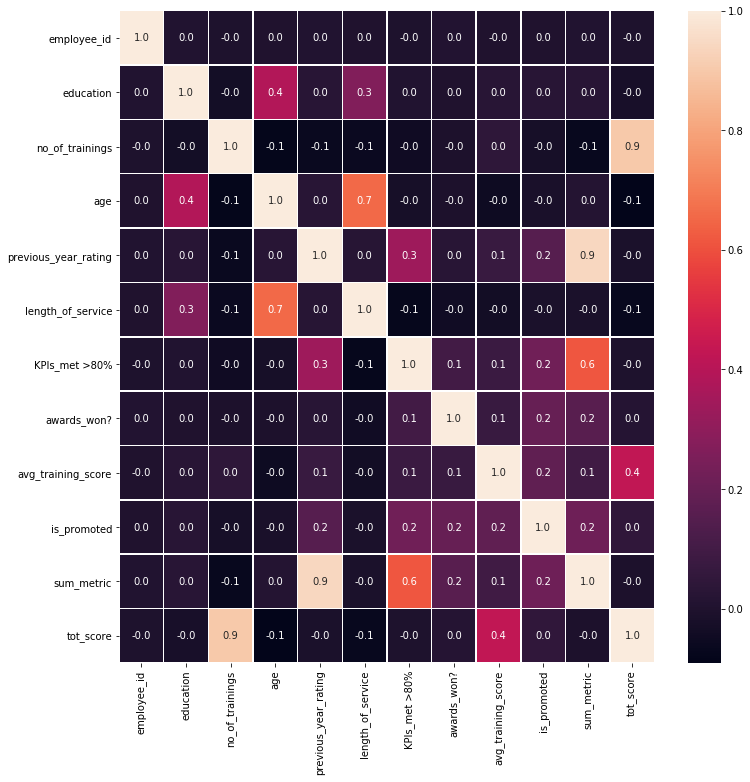

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
f,ax=plt.subplots(figsize=(12,12))
sns.heatmap(train.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)

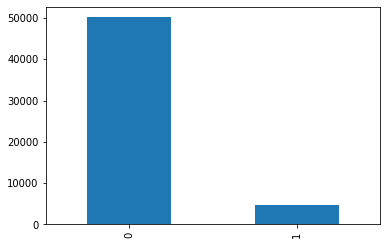

In [0]:
train['is_promoted'].value_counts().sort_index().head(20).plot.bar()

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

train['department'] = le.fit_transform(train['department'])
test['department'] = le.transform(test['department'])

In [0]:
train['region'] = le.fit_transform(train['region'])
test['region'] = le.transform(test['region'])
#train['education'] = le.fit_transform(train['education'])
#test['education'] = le.transform(test['education'])
train['gender'] = le.fit_transform(train['gender'])
test['gender'] = le.transform(test['gender'])

In [0]:
train.shape,test.shape


((54808, 16), (23490, 15))

In [0]:
targetvar =train['is_promoted'] 
train=train.drop(['employee_id','recruitment_channel','is_promoted'],axis=1)
test=test.drop(['employee_id','recruitment_channel'],axis=1)
#'recruitment_channel','employee_id'
#train=train.drop(['is_promoted'],axis=1)

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(train)
train_pca = pca.transform(train)
test_pca = pca.transform(test)

principalDftrain = pd.DataFrame(data = train_pca, columns = ['principal component 1', 'principal component 2'])
principalDftest = pd.DataFrame(data = test_pca, columns = ['principal component 1', 'principal component 2'])

train = pd.concat([principalDftrain, train], axis = 1)
test = pd.concat([principalDftest, test], axis = 1)


#train=np.column_stack((train,train_pca))
#test=np.column_stack((test,test_pca))

In [0]:
train = pd.concat([train,targetvar], axis = 1)

In [0]:
train['work_fraction'] = train['length_of_service'] / train['age']
test['work_fraction'] = test['length_of_service'] / test['age']
train['start_year'] = train['age'] - train['length_of_service']
test['start_year'] = test['age'] - test['length_of_service']

In [0]:
# Create Tabular Data set

In [0]:
test.shape,train.shape,submit.shape
#valid_idx = range(len(train)-10962, len(train))

((23490, 15), (54808, 16), (23490, 2))

In [0]:
train.columns
catnames = ['department', 'region', 'education', 'gender',]
contvars= ['no_of_trainings', 'age', 'previous_year_rating','length_of_service', 'KPIs_met >80%', 'awards_won?','avg_training_score','sum_metric',
           'tot_score','principal component 1', 'principal component 2','work_fraction','start_year']
dep_var  = 'is_promoted'

In [0]:
procs = [FillMissing, Categorify, Normalize]
#data = TabularDataBunch.from_df(path, train, dep_var, valid_idx=valid_idx, procs=procs, cat_names=cat_names)

data = (TabularList.from_df(train, procs=procs, cont_names=contvars, cat_names=catnames)
        .split_by_idx(valid_idx=range(int(len(train)*0.85),len(train)))
        .label_from_df(cols=dep_var)
        .add_test(TabularList.from_df(test, cat_names=catnames, cont_names=contvars, procs=procs))
        .databunch())


In [0]:
#F1 = partial(MultiLabelFbeta, beta=1, average="macro")
weights = [0.3, 1]
class_weights=torch.FloatTensor(weights).cuda()


from sklearn.metrics import f1_score
#f_score = partial(fbeta, sigmoid=True, beta = 1)
#,loss_func=imbalance_loss_func

#x.cpu().numpy()
def f1(preds, targs):
    pred_prob, pred_class = preds.max(1)
    preds = pred_class.cpu().numpy().astype(np.int)
    targs = targs.cpu().numpy().astype(np.int)
    #print(preds)
    #print(targs)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        return f1_score(targs, preds)
                        
learn = tabular_learner(data, layers=[300,100], emb_szs={'department': 2,'region': 2,'education': 2,}, metrics=[FBeta()],wd=0.01)

learn.crit = nn.CrossEntropyLoss(weight=class_weights)
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,f_beta,time
0,0.167766,0.171549,0.367306,00:07


In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


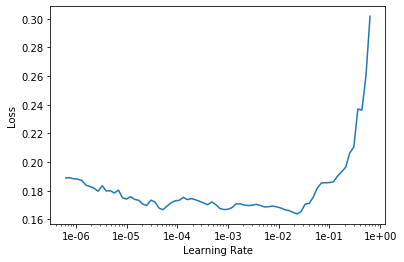

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5,slice(1e-3))

epoch,train_loss,valid_loss,f_beta,time
0,0.162170,0.173100,0.361286,00:07
1,0.159439,0.169305,0.367428,00:07
2,0.173221,0.166385,0.372024,00:08
3,0.167837,0.165200,0.382334,00:07
4,0.162590,0.165192,0.377763,00:07


In [0]:
learn.unfreeze()
learn.fit_one_cycle(15,slice(1e-2))
#learn.fit_one_cycle(3,1e-1)  #max_lr=slice(1e-1,1e-5))
#learn.fit_one_cycle(20, slice(1e-2))

epoch,train_loss,valid_loss,f_beta,time
0,0.166394,0.171693,0.362583,00:07
1,0.183797,0.180652,0.345286,00:07
2,0.173443,0.173374,0.335447,00:07
3,0.173010,0.178285,0.296696,00:07
4,0.171296,0.169843,0.372024,00:08
5,0.176446,0.170210,0.352277,00:08
6,0.160856,0.170060,0.362823,00:07
7,0.170471,0.166402,0.388907,00:07
8,0.176318,0.166388,0.381328,00:07
9,0.166250,0.166490,0.364964,00:07


In [0]:
preds, _ = learn.get_preds(ds_type=DatasetType.Test)
pred_prob, pred_class = preds.max(1)
submission = pd.DataFrame({'employee_id':submit['employee_id'],'is_promoted':pred_class})

In [0]:
submission.to_csv(path+'Submit_result3.csv')

In [0]:
#LGBM

In [0]:
# To calculate F1 score
from sklearn.metrics import f1_score

def lgb_f1_score(y_hat, data):
    y_true = data.get_label()
    y_hat = np.round(y_hat) # scikits f1 doesn't like probabilities
    return 'f1', f1_score(y_true, y_hat), True

In [0]:
def run_lgb(X_train, X_test, y_train, y_test, test_df):
    params = {
        "objective" : "binary",
       "n_estimators":10000,
       "reg_alpha" : 0.1,
       "reg_lambda":0.1,
       "n_jobs":-1,
       "colsample_bytree":.8,
       "min_child_weight":8,
       "subsample":0.8715623,
       "min_data_in_leaf":100,
       "nthread":4,
       "metric" : "f1",
       "num_leaves" : 600,
       "learning_rate" : 0.01,
       "verbosity" : -1,
       "seed": 120,
       "max_bin":60,
       'max_depth':15,
       'min_gain_to_split':.0222415,
       'scale_pos_weight':2
    }
    
    lgtrain = lgb.Dataset(X_train, label=y_train)
    lgval = lgb.Dataset(X_test, label=y_test)
    evals_result = {}
    model = lgb.train(params, lgtrain, 10000, 
                      valid_sets=[lgtrain, lgval], 
                      early_stopping_rounds=100, 
                      verbose_eval=100, 
                      evals_result=evals_result,feval=lgb_f1_score)
    
    pred_test_y = model.predict(test_df, num_iteration=model.best_iteration)
    return pred_test_y, model, evals_result

In [0]:
targetvar =train['is_promoted'] 
train=train.drop(['is_promoted'],axis=1)
#test=test.drop(['employee_id','recruitment_channel'],axis=1)

In [0]:
submit = pd.read_csv(path+'sample_submission.csv')

In [0]:
%%time
from sklearn.model_selection import KFold, StratifiedKFold
import lightgbm as lgb

folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=2333)
oof = np.zeros(len(train))
predictions = np.zeros(len(test))

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train,targetvar.values)):
    print("fold {}".format(fold_))
    trn_data = lgb.Dataset(train.iloc[trn_idx], label=targetvar.iloc[trn_idx])
    val_data = lgb.Dataset(train.iloc[val_idx], label=targetvar.iloc[val_idx])

    pred_test, model, evals_result = run_lgb(train.iloc[trn_idx], train.iloc[val_idx], targetvar.iloc[trn_idx], targetvar.iloc[val_idx], test)
    #predictions += pred_test/folds.n_splits
    #predictions += pred_test
    submit['fold{}'.format(fold_+1)] = pred_test #/folds.n_splits

print("LightGBM Training Completed...")


fold 0
Training until validation scores don't improve for 100 rounds.
[100]	training's f1: 0.376226	valid_1's f1: 0.339223
[200]	training's f1: 0.520726	valid_1's f1: 0.461295
[300]	training's f1: 0.554023	valid_1's f1: 0.490166
[400]	training's f1: 0.58352	valid_1's f1: 0.497024
[500]	training's f1: 0.603394	valid_1's f1: 0.497791
Early stopping, best iteration is:
[451]	training's f1: 0.596269	valid_1's f1: 0.502216
fold 1
Training until validation scores don't improve for 100 rounds.
[100]	training's f1: 0.378171	valid_1's f1: 0.405451
[200]	training's f1: 0.508463	valid_1's f1: 0.502311
[300]	training's f1: 0.552701	valid_1's f1: 0.528302
[400]	training's f1: 0.580096	valid_1's f1: 0.535613
[500]	training's f1: 0.604154	valid_1's f1: 0.538028
Early stopping, best iteration is:
[417]	training's f1: 0.584719	valid_1's f1: 0.538462
fold 2
Training until validation scores don't improve for 100 rounds.
[100]	training's f1: 0.393156	valid_1's f1: 0.323268
[200]	training's f1: 0.517667	va

In [0]:
submit['is_promoted'] = np.mean(submit[[col for col in submit.columns if col not in ['employee_id', 'is_promoted']]].values, axis=1)

In [0]:
submit['is_promoted'] = submit['is_promoted'].round(0).astype(int)

In [0]:
#submission = pd.DataFrame({'employee_id':submit['employee_id'],'is_promoted':predictions.astype(int)})
#submission = submission.reset_index()
submit[['employee_id', 'is_promoted']].to_csv(path+'submit_5.csv')

In [0]:
submit['is_promoted'] 

0        0
1        0
2        0
3        0
4        0
        ..
23485    0
23486    0
23487    0
23488    0
23489    1
Name: is_promoted, Length: 23490, dtype: int64